In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df = pd.read_csv("C:\\Users\\vmadmin\\Documents\\GitHub\\RegressionAnalysis-CarPricePrediction\\car_price_prediction.csv")
len(df)

19237

In [133]:
df.head(5)

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [134]:
# df.info
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [135]:
df.drop('ID', axis=1, inplace=True)

In [136]:

df.describe()

Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   1.855593e+04   2010.912824      4.582991      6.582627
std    1.905813e+05      5.668673      1.199933      4.320168
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    5.331000e+03   2009.000000      4.000000      4.000000
50%    1.317200e+04   2012.000000      4.000000      6.000000
75%    2.207500e+04   2015.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

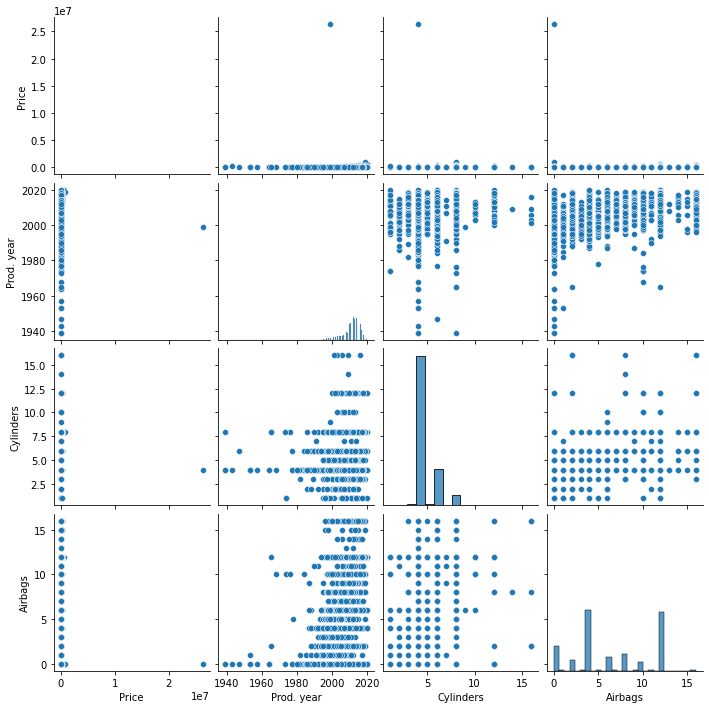

In [137]:
sns.pairplot(df)

## REMOVE EXTREME VALUES from 'PRICE'

In [138]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [139]:
quant1 = df['Price'].quantile(0.25)
quant3 = df['Price'].quantile(0.75)
iqr = quant3 - quant1
iqr

16744.0

In [140]:
lower_lim = quant1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = 0
upper_lim = quant3 + 15*iqr

In [141]:
lower_lim,upper_lim

(0, 273235.0)

In [142]:
outlier_low = df['Price'] <= lower_lim
outlier_high = df['Price'] >=upper_lim

# len(df[(outlier_low | outlier_high)])
df[(outlier_low | outlier_high)]

Price  Levy   Manufacturer                    Model  Prod. year  \
1225     627220     -  MERCEDES-BENZ           G 65 AMG 63AMG        2020   
5008     308906  1694        PORSCHE                      911        2016   
7749     288521  2269            BMW  M5 Машина в максимально        2018   
8541     872946  2067    LAMBORGHINI                     Urus        2019   
9367     297930     -  MERCEDES-BENZ                 AMG GT S        2015   
14839    297930     -     LAND ROVER        Range Rover Vogue        2019   
16983  26307500     -           OPEL                    Combo        1999   

          Category Leather interior Fuel type Engine volume   Mileage  \
1225          Jeep              Yes    Petrol     6.3 Turbo      0 km   
5008         Coupe              Yes    Petrol             4   8690 km   
7749         Sedan              Yes    Petrol           4.4  13500 km   
8541     Universal              Yes    Petrol             4   2531 km   
9367         Coupe              Yes    Petrol     4.0 Turbo  20000 km   
14839         Jeep              Yes    Diesel     3.0 Turbo   4500 km   
16983  Goods wagon               No    Diesel           1.7  99999 km   

       Cylinders Gear box type Drive wheels   Doors       Wheel  Color  \
1225         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
5008         6.0     Automatic         Rear  02-Mar  Left wheel  Black   
7749         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
8541         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
9367         8.0     Tiptronic         Rear  02-Mar  Left wheel  White   
14839        8.0     Tiptronic          4x4  04-May  Left wheel  Black   
16983        4.0        Manual        Front  02-Mar  Left wheel   Blue   

       Airbags  
1225        12  
5008        12  
7749         0  
8541         0  
9367        16  
14839       12  
16983        0

In [146]:
df_fin = df[~(outlier_low | outlier_high)].copy()
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19230 rows x 17 columns]

## Update the Mileage Column to numeric

In [147]:
list_mileage = df_fin['Mileage'].values


- Step 1: Convert all entries to String to apply regular expression
        -> Use .astype('str')
- Step 2: Apply the extractall () from regular expressions
        -> .str.extractall('(\d+)') - this will match for 1 or more digits
- Step 3: use unstack as multiple matches will be achieved. We only need final match per row, so use
        -> .unstack()
- Step 4: Use fill_na('') to replace all nan values, otherwise any operation that involves a Nan value will have nan results
- Step5. .sum(axis =1) is used to bring all numbers to one cell
- Finally convert to int by .astype(int)

In [148]:
new_mileage_list = df_fin['Mileage'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df_fin.drop('Mileage',axis=1,inplace=True)


In [149]:
df_fin['Mileage_km'] = new_mileage_list
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Cylinders Gear box type  \
0                  Yes    Hybrid           3.5        6.0     Automatic   
1                   No    Petrol             3        6.0     Tiptronic   
2                   No    Petrol           1.3        4.0      Variator   
3                  Yes    Hybrid           2.5        4.0     Automatic   
4                  Yes    Petrol           1.3        4.0     Automatic   
...                ...       ...           ...        ...           ...   
19232              Yes       CNG     2.0 Turbo        4.0        Manual   
19233              Yes    Petrol           2.4        4.0     Tiptronic   
19234              Yes    Diesel             2        4.0     Automatic   
19235              Yes    Diesel             2        4.0     Automatic   
19236              Yes    Hybrid           2.4        4.0     Automatic   

      Drive wheels   Doors             Wheel   Color  Airbags  Mileage_km  
0              4x4  04-May        Left wheel  Silver       12      186005  
1              4x4  04-May        Left wheel   Black        8      192000  
2            Front  04-May  Right-hand drive   Black        2      200000  
3              4x4  04-May        Left wheel   White        0      168966  
4            Front  04-May        Left wheel  Silver        4       91901  
...            ...     ...               ...     ...      ...         ...  
19232         Rear  02-Mar        Left wheel  Silver        5      300000  
19233        Front  04-May        Left wheel     Red        8      161600  
19234        Front  04-May        Left wheel    Grey        4      116365  
19235        Front  04-May        Left wheel   Black        4       51258  
19236        Front  04-May        Left wheel   White       12      186923  

[19230 rows x 17 columns]

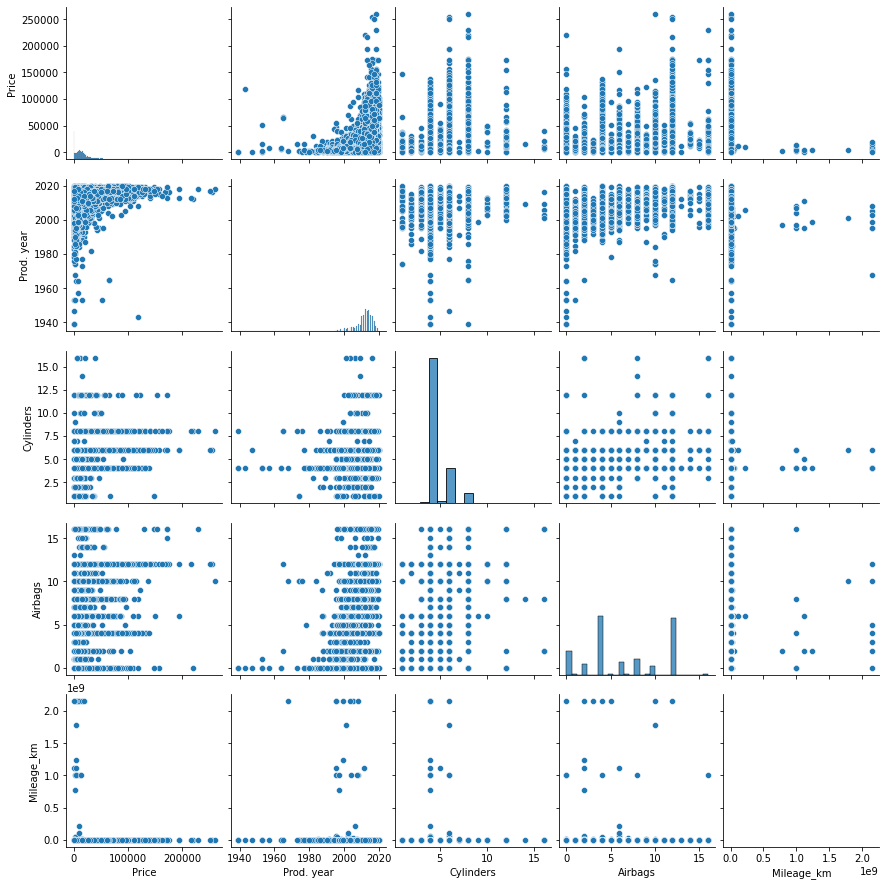

In [150]:
sns.pairplot(df_fin)

## Inferences from the ScatterPlots

- Latest and Newest cars are more expensive than if they are old
- Mileage vs Price Graphs shows that as the Mileage increases Price reduces drastically
- Newer Production Cars have more airbags in general than old production cars
- Newer Production Year Cars have more cylinders in general than old production year cars

In [151]:
df_fin.head()

Price  Levy Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328  1399        LEXUS   RX 450        2010       Jeep              Yes   
1  16621  1018    CHEVROLET  Equinox        2011       Jeep               No   
2   8467     -        HONDA      FIT        2006  Hatchback               No   
3   3607   862         FORD   Escape        2011       Jeep              Yes   
4  11726   446        HONDA      FIT        2014  Hatchback              Yes   

  Fuel type Engine volume  Cylinders Gear box type Drive wheels   Doors  \
0    Hybrid           3.5        6.0     Automatic          4x4  04-May   
1    Petrol             3        6.0     Tiptronic          4x4  04-May   
2    Petrol           1.3        4.0      Variator        Front  04-May   
3    Hybrid           2.5        4.0     Automatic          4x4  04-May   
4    Petrol           1.3        4.0     Automatic        Front  04-May   

              Wheel   Color  Airbags  Mileage_km  
0        Left wheel  Silver       12      186005  
1        Left wheel   Black        8      192000  
2  Right-hand drive   Black        2      200000  
3        Left wheel   White        0      168966  
4        Left wheel  Silver        4       91901

In [152]:
print('Total:',len(df_fin))
print('Unique Manufacturer:',len(df_fin.Manufacturer.unique()))
print('Unique Model:',len(df_fin.Model.unique()))
print('Unique Engine Volume:',len(df_fin['Engine volume'].unique()))
print('Unique Fuel Type:',len(df_fin['Fuel type'].unique()))
print('Unique Cylinders:',len(df_fin.Cylinders.unique()))
print('Unique Category:',len(df_fin.Category.unique()))
print('Unique Production Year:',len(df_fin['Prod. year'].unique())) #Good Representation

Total: 19230
Unique Manufacturer: 64
Unique Model: 1585
Unique Engine Volume: 107
Unique Fuel Type: 7
Unique Cylinders: 13
Unique Category: 11
Unique Production Year: 54


In [153]:
print('Total:',len(df_fin))
print('\n')
print('Unique Manufacturer:',df_fin.Manufacturer.unique())
print('\n')
print('Unique Model:',df_fin.Model.unique())
print('\n')
print('Unique Engine Volume:',df_fin['Engine volume'].unique())
print('\n')
print('Unique Fuel Type:',df_fin['Fuel type'].unique())
print('\n')
print('Unique Cylinders:',df_fin.Cylinders.unique())
print('\n')
print('Unique Category:',df_fin.Category.unique())
print('\n')
print('Unique Production Year:',df_fin['Prod. year'].unique()) #Good Representation

Total: 19230


Unique Manufacturer: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'ROLLS-ROYCE' 'PONTIAC' 'SATURN'
 'ASTON MARTIN' 'GREATWALL']


Unique Model: ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


Unique Engine Volume: ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1

### NON NUMERIC COLUMNS
1. Don't Consider Model Name
2. Don't Consider Manufacturer Name
3. Change the Entire Unique Fuel Type -> One Hot Encoding 
4. Change the Engine Volume to numeric instead of strings
5. Change the Cylinders to integer 
6. OPTIONAL - Try One Hot Encoding in the Unique Category
7. Change Leather Seats to Y/N and do One Hot Encoding

### NUMERIC COLUMNS
1. Price	
2. Prod. year	
3. Cylinders	
4. Airbags


In [158]:
df_fin.Doors.unique()
#Drop the Doors Column because it is filledd with wrong information
# or
# Change the 04-May to only number as 04 and 02-Mar as 02 abd >5 as 5

array(['04-May', '02-Mar', '>5'], dtype=object)

### Dataset Distribution

In [41]:
import plotly.express as px

In [159]:
df_fin.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Mileage_km'],
      dtype='object')

In [48]:
tmp = df[df['Manufacturer']=='LAMBORGHINI']
tmp

Price  Levy Manufacturer Model  Prod. year   Category Leather interior  \
8541  872946  2067  LAMBORGHINI  Urus        2019  Universal              Yes   

     Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
8541    Petrol             4  2531 km        8.0     Tiptronic          4x4   

       Doors       Wheel  Color  Airbags  
8541  04-May  Left wheel  Black        0

In [160]:
print(df_fin['Manufacturer'].unique())
df1 = df_fin[['Manufacturer','Price']]
fig = px.scatter(df1, x='Manufacturer',y='Price',color = 'Manufacturer')
fig.show()

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'ROLLS-ROYCE' 'PONTIAC' 'SATURN'
 'ASTON MARTIN' 'GREATWALL']


In [161]:
df2 = df_fin[['Leather interior','Price']]
fig2 = px.scatter(df2, x='Leather interior',y='Price',color = 'Leather interior')
fig2.show()